# Sales Analysis Project


#### Project Statement:


AAL is a household name in Australia, known for its clothing business since 2000. It caters to all groups— kids, women, men, and seniors. It has opened branches in many states in Australia, in metropolises and tier-1 and tier-2 cities. 
The business is booming, and the company is in an expansion mode. It wants to get an in-depth understanding of its sales so that it can make investment decisions. The CEO has tasked the Head of Sales and Marketing (S&M) of AAL to:

1- Determine the states that are generating the highest revenues and

2- Formulate sales programs for states with lower revenues. The Head of S&M has approached you for the same.

Analyze the company’s sales data for the fourth quarter across Australia, and state by state and help the company make data-driven decisions for the coming year. 

Perform the following steps:

As a data scientist, you must perform the following main steps on the enclosed data.


#### 1.	Data Wrangling

●	Ensure that the data is clean and that there is no missing or incorrect data. 

●	Inspect the data manually for missing/incorrect data using the functions isna(), and notna().

●	Based on your knowledge of Data Analytics, include your recommendations for treating missing data and incorrect data. (dropping the null values or filling them).

●	Select an appropriate Data Wrangling approach —  data standardization or data normalization. Perform the standardization or normalization and present the data. (Normalization is the preferred approach for this problem.)

●	Share your recommendation on the usage of the groupby() function for data chunking or merging.

#### 2.	Data Analysis

●	Perform descriptive statistical analysis on the data (Sales and Unit columns) (Techniques such as mean, median, mode and standard deviation can be used.). 

●	Determine which group is generating the highest sales, and which group is generating the lowest sales.

●	Determine which state is generating the highest sales, and which state is generating the lowest sales.

●	Generate weekly, Daily reports for the analysis made.
(Use suitable libraries such as NumPy, Pandas, SciPy etc. for performing the analysis.)

#### 3.	Data Visualization

●	Use appropriate data visualization libraries to build a dashboard for the Head of S&M that includes for the key parameters like 

●	State-wise sales analysis for different groups (kids, women, men, and seniors) 

●	Group-wise sales analysis (kids, women, men, and seniors) across different states.

●	Time-of-the-day analysis: during which time of the day are sales the highest, and during which time are sales the lowest? [This helps S&M teams design programs for increasing sales such as hyper-personalization and Next Best Offers].

The dashboard must contain daily, weekly, monthly and quarterly charts.
 (Any visualization library can be used for this purpose. However, since statistical analysis is being done, 
 Seaborn is preferred.)

●	Include your recommendation, and indicate why you are choosing the recommended visualization package.

#### 4.	Report Generation 

●	Use JupyterLab Notebook for report generation (wrangling, analysis and visualization) Please note that JupyterLab allows you to mix code with graphs and plots etc.

●	Use Markdown in suitable places, while presenting your report. 

●	The report should contain suitable graphs, plots and analysis reports, and recommendations. Please note that different aspects of analysis demand different graphs/plots. 

●	Use box plot for descriptive statistics

●	Use Seaborn distribution plot for any other statistical plotting.




## Import libraries

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets


df = pd.read_csv('SalesAnalysis.csv')

print('yes')

yes


## 1. Data Wrangling

### ● Ensure that the data is clean and that there is no missing or incorrect data.


In [22]:
df.head(10)

,Date,Time,State,Group,Unit,Sales
0,1-Oct-20,Morning,WA,Kids,8,20000
1,1-Oct-20,Morning,WA,Men,8,20000
2,1-Oct-20,Morning,WA,Women,4,10000
3,1-Oct-20,Morning,WA,Seniors,15,37500
4,1-Oct-20,Afternoon,WA,Kids,3,7500
5,1-Oct-20,Afternoon,WA,Men,10,25000
6,1-Oct-20,Afternoon,WA,Women,3,7500
7,1-Oct-20,Afternoon,WA,Seniors,11,27500
8,1-Oct-20,Evening,WA,Kids,15,37500
9,1-Oct-20,Evening,WA,Men,15,37500


In [23]:
df.sample(10)

,Date,Time,State,Group,Unit,Sales
1618,20-Oct-20,Evening,NT,Women,11,27500
1185,15-Oct-20,Evening,WA,Men,13,32500
3113,8-Nov-20,Afternoon,WA,Men,9,22500
415,5-Oct-20,Afternoon,TAS,Seniors,10,25000
5157,2-Dec-20,Evening,SA,Men,27,67500
1005,12-Oct-20,Evening,TAS,Men,9,22500
2209,27-Oct-20,Morning,SA,Men,26,65000
7364,28-Dec-20,Evening,QLD,Kids,19,47500
6352,16-Dec-20,Afternoon,QLD,Kids,19,47500
1948,24-Oct-20,Afternoon,NT,Kids,7,17500


In [24]:
df.describe()

,Unit,Sales
count,7560.000000,7560.000000
mean,18.005423,45013.558201
std,12.901403,32253.506944
min,2.000000,5000.000000
25%,8.000000,20000.000000
50%,14.000000,35000.000000
75%,26.000000,65000.000000
max,65.000000,162500.000000


### ● Inspect the data manually for missing/incorrect data using the functions isna(), and notna().


In [25]:
df.Date.isna().sum()

0

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7560 entries, 0 to 7559
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    7560 non-null   datetime64[ns]
 1   Time    7560 non-null   object        
 2   State   7560 non-null   object        
 3   Group   7560 non-null   object        
 4   Unit    7560 non-null   int64         
 5   Sales   7560 non-null   int64         
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 354.5+ KB


In [27]:
len(df.columns)

6

In [28]:
df.shape[0]

7560

### ● Based on your knowledge of Data Analytics, include your recommendations for treating missing data and incorrect data. (dropping the null values or filling them).

### ● Select an appropriate Data Wrangling approach — data standardization or data normalization. Perform the standardization or normalization and present the data. (Normalization is the preferred approach for this problem.)

### **There is no missing data, thus there is no need to drop nor fill any column.**

### ● Share your recommendation on the usage of the groupby() function for data chunking or merging.


In [29]:
df.groupby('Group').agg({'Sales': ['mean', 'min', 'max']}) 

Sales              
                  mean   min     max
Group                               
 Kids     45011.904762  5000  162500
 Men      45370.370370  5000  160000
 Seniors  44464.285714  5000  162500
 Women    45207.671958  5000  162500

In [30]:
df.groupby('State').agg({'Sales': ['mean', 'min', 'max']}) 

Sales               
               mean    min     max
State                             
 NSW   69416.666667  30000  112500
 NT    20907.407407   5000   37500
 QLD   30942.129630   7500   62500
 SA    54497.685185  25000   87500
 TAS   21074.074074   5000   37500
 VIC   97745.370370  50000  162500
 WA    20511.574074   5000   37500

In [31]:
df.groupby('Time').agg({'Sales': ['mean', 'min', 'max']}) 

Sales              
                    mean   min     max
Time                                  
 Afternoon  45241.071429  5000  162500
 Evening    44479.166667  5000  162500
 Morning    45320.436508  5000  162500

## 2. Data Analysis

### ● Perform descriptive statistical analysis on the data (Sales and Unit columns) (Techniques such as mean, median, mode and standard deviation can be used.).

### ● Determine which group is generating the highest sales, and which group is generating the lowest sales.

### ● Determine which state is generating the highest sales, and which state is generating the lowest sales.


In [32]:
# Descriptive statistics for Sales and Unit columns

sales_stats = df['Sales'].describe()
unit_stats = df['Unit'].describe()

# Group generating highest and lowest sales

group_sales = df.groupby('Group')['Sales'].sum()
highest_sales_group = group_sales.idxmax()
lowest_sales_group = group_sales.idxmin()

# State generating highest and lowest sales

state_sales = df.groupby('State')['Sales'].sum()
highest_sales_state = state_sales.idxmax()
lowest_sales_state = state_sales.idxmin()



# The results

print("Descriptive Statistics for Sales:")

print(sales_stats)

print("\nDescriptive Statistics for Unit:")

print(unit_stats)

print("\nGroup generating the highest sales:", highest_sales_group)

print("Group generating the lowest sales:", lowest_sales_group)

print("\nState generating the highest sales:", highest_sales_state)

print("State generating the lowest sales:", lowest_sales_state)




Descriptive Statistics for Sales:
count      7560.000000
mean      45013.558201
std       32253.506944
min        5000.000000
25%       20000.000000
50%       35000.000000
75%       65000.000000
max      162500.000000
Name: Sales, dtype: float64

Descriptive Statistics for Unit:
count    7560.000000
mean       18.005423
std        12.901403
min         2.000000
25%         8.000000
50%        14.000000
75%        26.000000
max        65.000000
Name: Unit, dtype: float64

Group generating the highest sales:  Men
Group generating the lowest sales:  Seniors

State generating the highest sales:  VIC
State generating the lowest sales:  WA


### ● Generate weekly, monthly and quarterly reports for the analysis made. (Use suitable libraries such as NumPy, Pandas, SciPy etc. for performing the analysis.)


Weekly Report:
               Sales
Date                
2020-10-04  15045000
2020-10-11  27002500
2020-10-18  26640000
2020-10-25  26815000
2020-11-01  21807500
2020-11-08  20865000
2020-11-15  21172500
2020-11-22  21112500
2020-11-29  21477500
2020-12-06  29622500
2020-12-13  31525000
2020-12-20  31655000
2020-12-27  31770000
2021-01-03  13792500


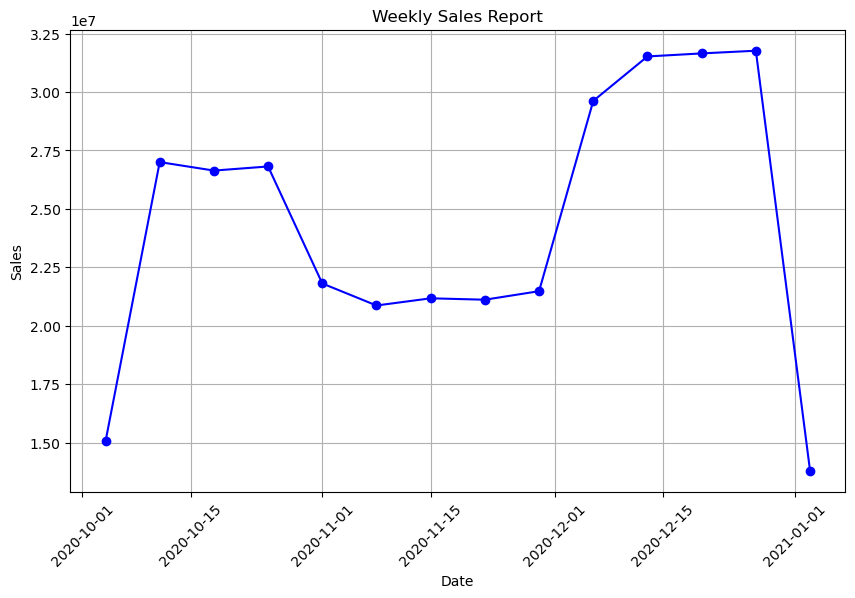

In [71]:
# Daily, Weekly reports

df['Date'] = pd.to_datetime(df['Date'])  # Convert Date column to datetime

dfweekly =df[['Date','Sales']]
dfweekly.index =dfweekly['Date']
weekly_report = dfweekly.resample('W').sum("Sales")


print("\nWeekly Report:")

print(weekly_report)

plt.figure(figsize=(10, 6))
plt.plot(weekly_report.index, weekly_report['Sales'], marker='o', linestyle='-', color='blue')

plt.title('Weekly Sales Report')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.grid(True)

plt.show()



### **- Here's what we can interpret from the plot:**

The x-axis represents the dates, indicating the time period covered by the sales report.

The y-axis represents the sales values, showing the amount of sales for each week.

Each data point on the plot represents the total sales for a specific week.

The blue line connects the data points, providing a visual representation of the trend in sales over time.

The markers ('o') on the line indicate the actual sales values for each week.

### **-By examining the plot, we can observe the following insights:**

We can identify any patterns or trends in the sales data over time

we can see if there are any consistent increases or decreases in sales.

We can compare the sales performance of different weeks and identify any significant changes or anomalies.

We can assess the overall sales trajectory and determine if there are any notable peaks or dips in sales.

\Daily Report:
                    Sales
Date       State         
2020-10-01  NSW    877500
            NT     260000
            QLD    397500
            SA     630000
            TAS    232500
...                   ...
2020-12-30  QLD    460000
            SA     850000
            TAS    352500
            VIC   1252500
            WA     340000

[630 rows x 1 columns]


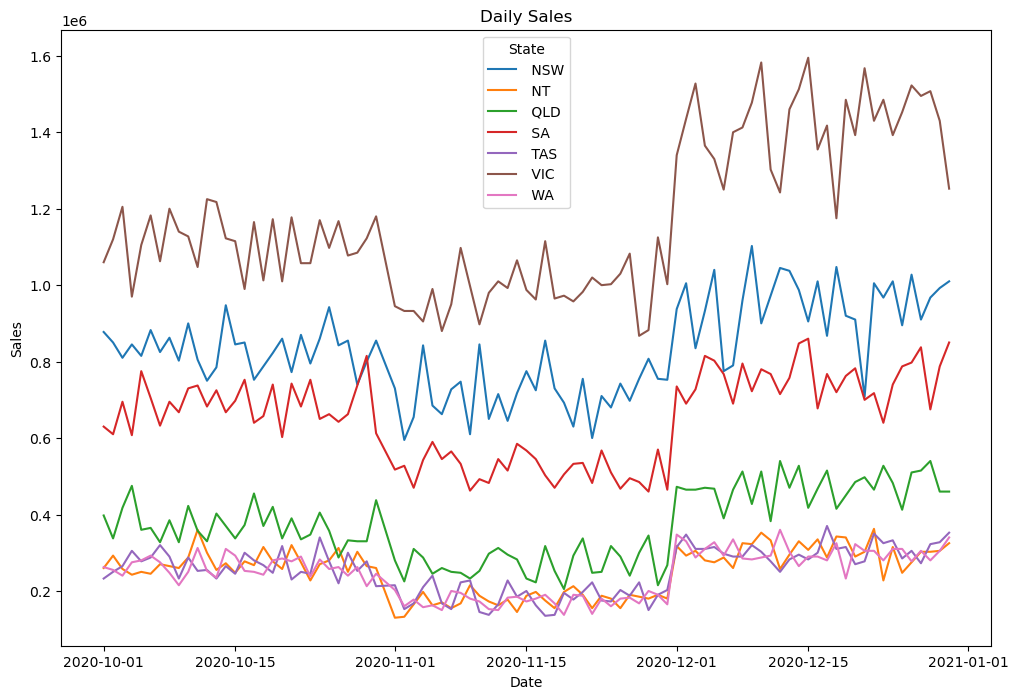

In [105]:


daily = df.drop(columns=['Time','Group','Unit'])
daily_report= daily.groupby(['Date','State']).sum()


print("\Daily Report:")

print(daily_report)


plt.figure(figsize=(12, 8))  
sns.lineplot(data=daily_report, x='Date', y='Sales', hue='State')

plt.title('Daily Sales')
plt.xlabel('Date')
plt.ylabel('Sales')

plt.show()







### **-Here's what we can interpret from the Daily Sales report plot:**

The x-axis represents the dates, indicating the time period covered by the sales report.

The y-axis represents the sales values, showing the amount of sales for each day.

Each data lines on the plot represents the sales values for a specific state.

The red color of the scatter points helps distinguish individual data points.


### **-By examining the plot, we can observe the following insights:-**

We can identify any patterns or trends in the daily sales data. For example, we can see if there are any consistent fluctuations or variations in sales over time.

We can compare the sales performance on different days and identify any significant changes or anomalies.

We can assess the distribution of sales values across the time period covered by the report.

The plot helps to visualize the daily sales data in a clear and concise manner, making it easier to understand and analyze the sales performance on a day-to-day basis.

----

## 3. Data Visualization

### ● Use appropriate data visualization libraries to build a dashboard for the Head of S&M that includes for the key parameters like

### ● State-wise sales analysis for different groups (kids, women, men, and seniors)


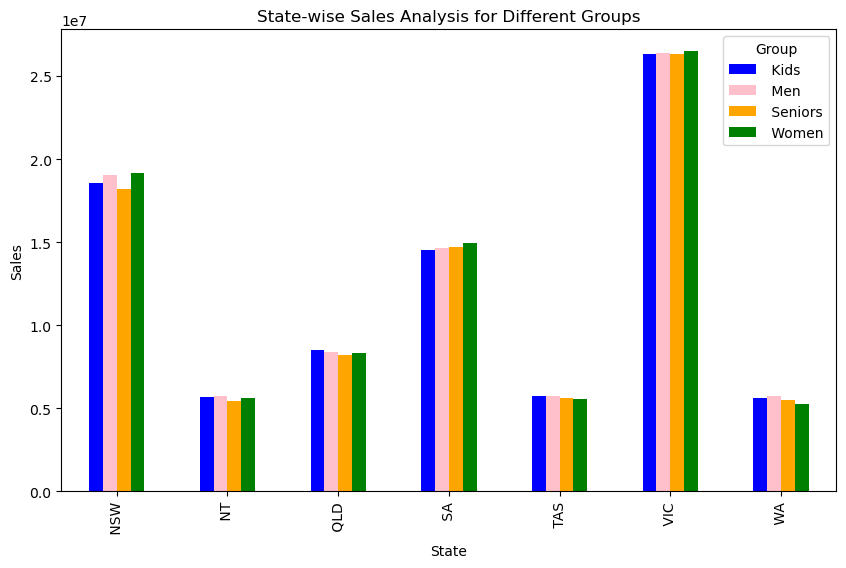

In [63]:

# State-wise sales analysis for different groups

state_group_sales = df.groupby(['State', 'Group'])['Sales'].sum().reset_index()

fig, ax = plt.subplots(figsize=(10, 6))
colors = {'Men': 'blue', 'Women': 'pink', 'Kids': 'orange', 'Seniors': 'green'}
state_group_sales.pivot(index='State', columns='Group', values='Sales').plot(kind='bar', ax=ax, color=colors.values())

plt.title('State-wise Sales Analysis for Different Groups')
plt.xlabel('State')
plt.ylabel('Sales')
plt.legend(title='Group')
plt.show()


### **- This plot uses pivot to reshape the data and create a bar plot with each state as a separate bar, grouped by the different groups. The legend shows the different groups represented by different colors. This plot provides a visual comparison of sales across different states and groups.**
-----

### ● Group-wise sales analysis (kids, women, men, and seniors) across different states.




<Figure size 2000x2000 with 0 Axes>

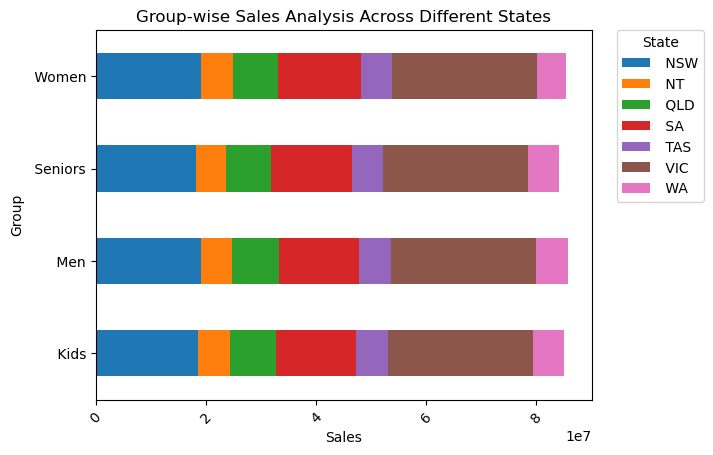

In [113]:
# Group-wise sales analysis across different states

group_state_sales = df.groupby(['Group', 'State'])['Sales'].sum().reset_index()
pivot_table = group_state_sales.pivot(index='Group', columns='State', values='Sales')

plt.figure(figsize=(20, 20))  
pivot_table.plot(kind='barh', stacked=True)

plt.title('Group-wise Sales Analysis Across Different States')
plt.xlabel('Sales')
plt.ylabel('Group')
plt.xticks(rotation=45)

plt.legend(title='State', bbox_to_anchor=(1.05,1), loc='upper left', borderaxespad=0)

plt.show()







### - This plot is a bar plot that represent each group and their sales, were the x axis represent the sales and the y axis represent each goup and every represent a state.

-------


### ● Time-of-the-day analysis: during which time of the day are sales the highest, and during which time are sales the lowest? [This helps S&M teams design programs for increasing sales such as hyper-personalization and Next Best Offers].



<Figure size 1200x800 with 0 Axes>

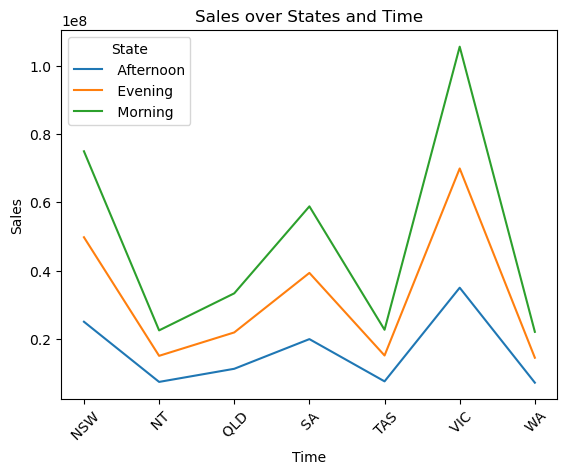

In [100]:


# Time-of-the-day analysis

TimeSales = df.groupby(['State', 'Time'])['Sales'].sum().unstack().fillna(0)

plt.figure(figsize=(12, 8))  # Adjust the figure size as per your preference
TimeSales.plot(kind='line', stacked=True)

plt.title('Sales over States and Time')
plt.xlabel('Time')
plt.ylabel('Sales')
plt.xticks(rotation=45)

plt.legend(title='State')

plt.show()



### - The result is a line plot were the x axis represent each state and the y axis represent the sales and each line represent the time of the day.
------

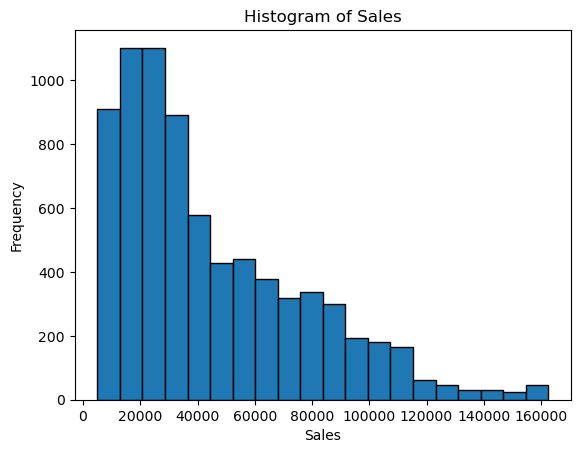

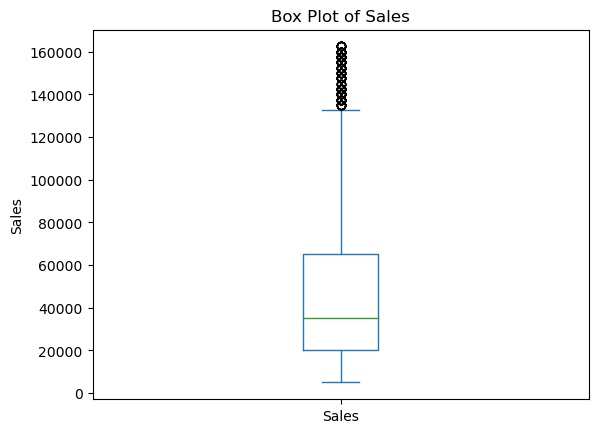

In [67]:
df['Sales'].plot(kind='hist', bins=20, edgecolor='black')

plt.title('Histogram of Sales')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()



df['Sales'].plot(kind='box')

plt.title('Box Plot of Sales')
plt.ylabel('Sales')
plt.show()

In [ ]:
df[df["Sales"]>=130000]

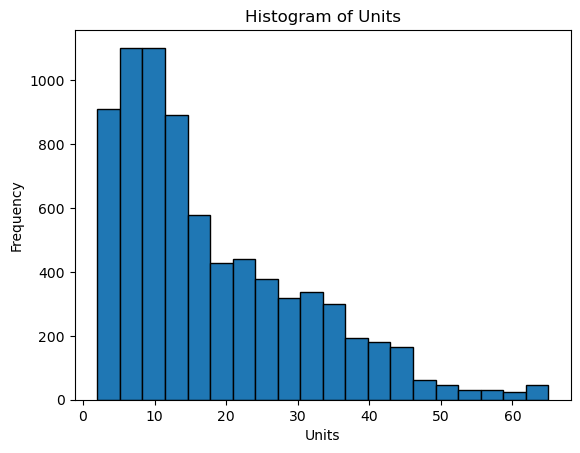

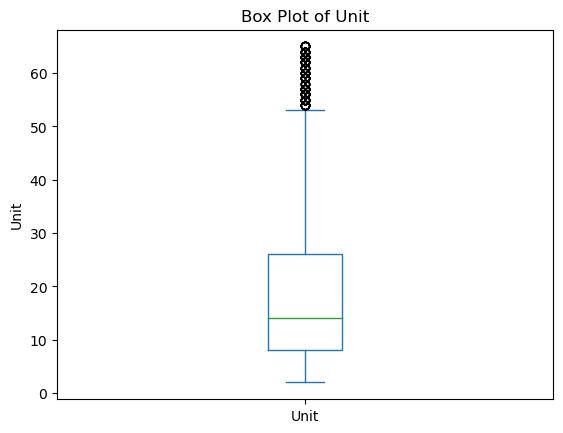

In [68]:
df['Unit'].plot(kind='hist', bins=20, edgecolor='black')

plt.title('Histogram of Units')
plt.xlabel('Units')
plt.ylabel('Frequency')
plt.show()


df['Unit'].plot(kind='box')

plt.title('Box Plot of Unit')
plt.ylabel('Unit')
plt.show()

---------------



# The Reccomendation Conclousion :

**The Recommendation:**

**For state-wise and group-wise sales analysis, we use the groupby() function to calculate the sum of sales for each state and group combination. We create bar plots using sns.catplot() to visualize the sales across different states and groups.**

**For time-of-the-day analysis, we extract the hour from the "Time" column and group the data by the hour. We calculate the sum of sales for each hour and create a line plot using sns.lineplot() to show the variation in sales throughout the day.**


**We chose seaborn for visualization because it is built on top of matplotlib and provides a high-level interface for creating attractive and informative statistical graphics. It offers a wide range of plot types and customization options, making it suitable for creating the requested dashboard.**


#### - based on these results bellow

Group generating the highest sales:  Men

Group generating the lowest sales:  Seniors

**To encourage seniors to buy more products from AAL, the clothing business in Australia, consider the following strategies:**

**- Senior-Focused Marketing:** Develop targeted marketing campaigns specifically tailored to seniors. Highlight the clothing styles, features, and benefits that are most appealing to this demographic. Use advertising channels that are popular among seniors, such as senior-focused magazines, websites, and social media platforms.

**- Senior Discounts and Promotions:** Offer exclusive discounts, promotions, or loyalty programs specifically for seniors. This can incentivize them to make more purchases and create a sense of value and appreciation for their patronage.

**- Product Adaptation:** Evaluate if there are any product modifications or adaptations that can be made to better suit the needs and preferences of seniors. Consider factors such as comfort, ease of use, and age-appropriate designs. Offering a range of sizes and styles that cater to different body types can also be beneficial.

**- In-Store Experience:** Create a welcoming and comfortable in-store experience for seniors. Ensure that the store layout is easily navigable, with clear signage and ample seating areas. Train staff to provide personalized assistance and recommendations to seniors, making them feel valued and well-cared for.

**- Online Shopping Convenience:** Enhance the online shopping experience for seniors by providing user-friendly interfaces, larger font sizes, and clear product descriptions. Offer online tutorials or guides to help seniors navigate the website and make informed purchasing decisions.

**- Community Engagement:** Engage with senior communities and organizations to build relationships and trust. Sponsor local events or initiatives that cater to seniors, such as fashion shows or workshops. This can help raise brand awareness and foster a positive reputation among seniors.

**- Customer Feedback and Surveys:** Regularly seek feedback from seniors to understand their preferences, challenges, and suggestions for improvement. Use this feedback to continuously refine and enhance the products and services offered to better meet their needs.




#### - based on these results bellow

Group generating the highest time sales:  Morning

Group generating the lowest time sales:  Evening

**To increase sales in the evening, when the company is currently experiencing lower sales, consider implementing the following strategies:**

**- Evening-Specific Promotions:** Create special promotions or discounts that are exclusively available during the evening hours. This can incentivize customers to make purchases during this time, knowing they can take advantage of unique deals.

**- Targeted Advertising:** Develop targeted advertising campaigns that specifically highlight the benefits of shopping in the evening. Emphasize factors such as a quieter shopping environment, personalized assistance, or exclusive product availability during these hours.

**- Extended Store Hours:** Consider extending the store hours in the evening to accommodate customers who prefer to shop later in the day. This can attract more foot traffic and provide convenience for those who may have work or other commitments during regular business hours.

**- Enhanced In-Store Experience:** Create a welcoming and engaging atmosphere in the store during the evening hours. Consider hosting special events, offering complimentary refreshments, or providing entertainment to make the shopping experience more enjoyable and memorable.

**- Online Shopping Convenience:** Ensure that the company's website is user-friendly and optimized for mobile devices. Highlight the convenience of online shopping during the evening, such as the ability to browse and purchase products from the comfort of home.

**- Social Media Engagement:** Increase social media activity during the evening hours to engage with customers and promote products. Share exclusive evening offers, conduct live Q&A sessions, or host virtual events to generate interest and drive sales.

**- Customer Feedback and Surveys:** Regularly seek feedback from customers to understand their preferences and expectations during the evening hours. Use this information to tailor products, services, and promotions to better meet their needs and desires.


#### - based on these results bellow

State generating the highest sales:  VIC

State generating the lowest sales:  WA

**To increase sales in WA and encourage more customers to buy products from the company, consider the following strategies:**


**- Targeted Marketing:** Develop marketing campaigns specifically tailored to the preferences and needs of customers in WA. Highlight any unique features or benefits of the products that may appeal to the local market.

**- Local Partnerships:** Collaborate with local businesses or organizations in WA to promote the company's products. This can include joint marketing initiatives, cross-promotions, or even exclusive product offerings for customers in the region.

**- Customer Feedback:** Gather feedback from customers in WA to understand their preferences, concerns, and expectations. Use this information to improve product offerings, customer service, and overall shopping experience to better cater to their needs.

**- Localized Events:** Organize events or participate in local trade shows, fairs.




# In Conclusion

### The newly opened branches are doing good and by the prediction its the right decisions to expand the company.

### Although they are doing well the company should do a strategy to rise the sales for seniors group and to increase the sales revenue in ( WA,  TAS, NT)